<a href="https://colab.research.google.com/github/Eswa2020/week-7-core-project/blob/main/Esther_Wairimu_Kamau_core_indepedent_project_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Research question 
 >As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### Objective of the Project
The main objective of this project is to determine factors affecting prices of houses and developing a model to effectively predict the sale prices.

* Definition of the research question and metrics of success.

* Loading of Dataset to Colab.

* Validation.

* Tidying the dataset.

* Exploratory Data Analysis: Univariate Analysis, Bivariate Analysis &    Multivariate Analysis

* Multiple Linear Regression

* Quantile Regressio

* Lasso Regression

* Ridge Regression

* Elastic Net Regression

Tools required for the project;

* Google Colab

* Python Library (Pandas, Numpy, matplotlib.pyplot, Seaborn, Sklearn)

* Github

### loading the dataset

In [ ]:
#importing our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#loading our datasets
df_house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')


### Exploring our dataset

In [ ]:
df_house.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
print(df_house.columns)

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
print(df_house.shape)

(21613, 20)


In [ ]:
print(df_house.isna().any())

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [ ]:
print(df_house.duplicated().sum())

3


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
print(df_house['bedrooms'].unique().tolist())
print(df_house['bathrooms'].unique().tolist())
print(df_house['floors'].unique().tolist())



[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]


In [ ]:
column_values1 = df_house[["long","lat"]].values.ravel()
print(column_values1)

[-122.257    47.5112 -122.319  ...   47.5345 -122.299    47.5941]


### cleaning data

In [ ]:
df_house.drop_duplicates(keep = False, inplace = True)
print(df_house.duplicated().any())

False


In [ ]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,4.580020e+09,5.401757e+05,3.370852,2.114720,2079.862683,1.510961e+04,1.494169,0.007544,0.234091,3.409451,7.656685,1788.305086,291.557597,1971.002083,84.242421,98077.951543,47.560045,-122.213923,1986.484889,12769.608460
std,2.876528e+09,3.674129e+05,0.930158,0.770244,918.559712,4.142594e+04,0.539998,0.086529,0.765955,0.650785,1.175542,828.186477,442.618358,29.371866,401.319142,53.505719,0.138580,0.140837,685.460263,27307.765664
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_house.drop(['id'], axis=1)
col = list(df_house.columns)
for i in col:
  max_thresold_h_s = df_house[i].quantile(0.95)
  min_thresold_h_s = df_house[i].quantile(0.05)
  df_house2 = df_house[(df_house[i]<max_thresold_h_s) & (df_house[i]>min_thresold_h_s)]
  num = df_house.shape[0]-df_house2.shape[0]
  print(f'{num} outliers valuecount in column {i}')
  print(' ')

2162 outliers valuecount in column id
 
2175 outliers valuecount in column price
 
4907 outliers valuecount in column bedrooms
 
5226 outliers valuecount in column bathrooms
 
2231 outliers valuecount in column sqft_living
 
2163 outliers valuecount in column sqft_lot
 
19703 outliers valuecount in column floors
 
21613 outliers valuecount in column waterfront
 
21281 outliers valuecount in column view
 
15934 outliers valuecount in column condition
 
3949 outliers valuecount in column grade
 
2202 outliers valuecount in column sqft_above
 
14219 outliers valuecount in column sqft_basement
 
2206 outliers valuecount in column yr_built
 
21613 outliers valuecount in column yr_renovated
 
2408 outliers valuecount in column zipcode
 
2164 outliers valuecount in column lat
 
2220 outliers valuecount in column long
 
2201 outliers valuecount in column sqft_living15
 
2162 outliers valuecount in column sqft_lot15
 


In [ ]:
df_house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

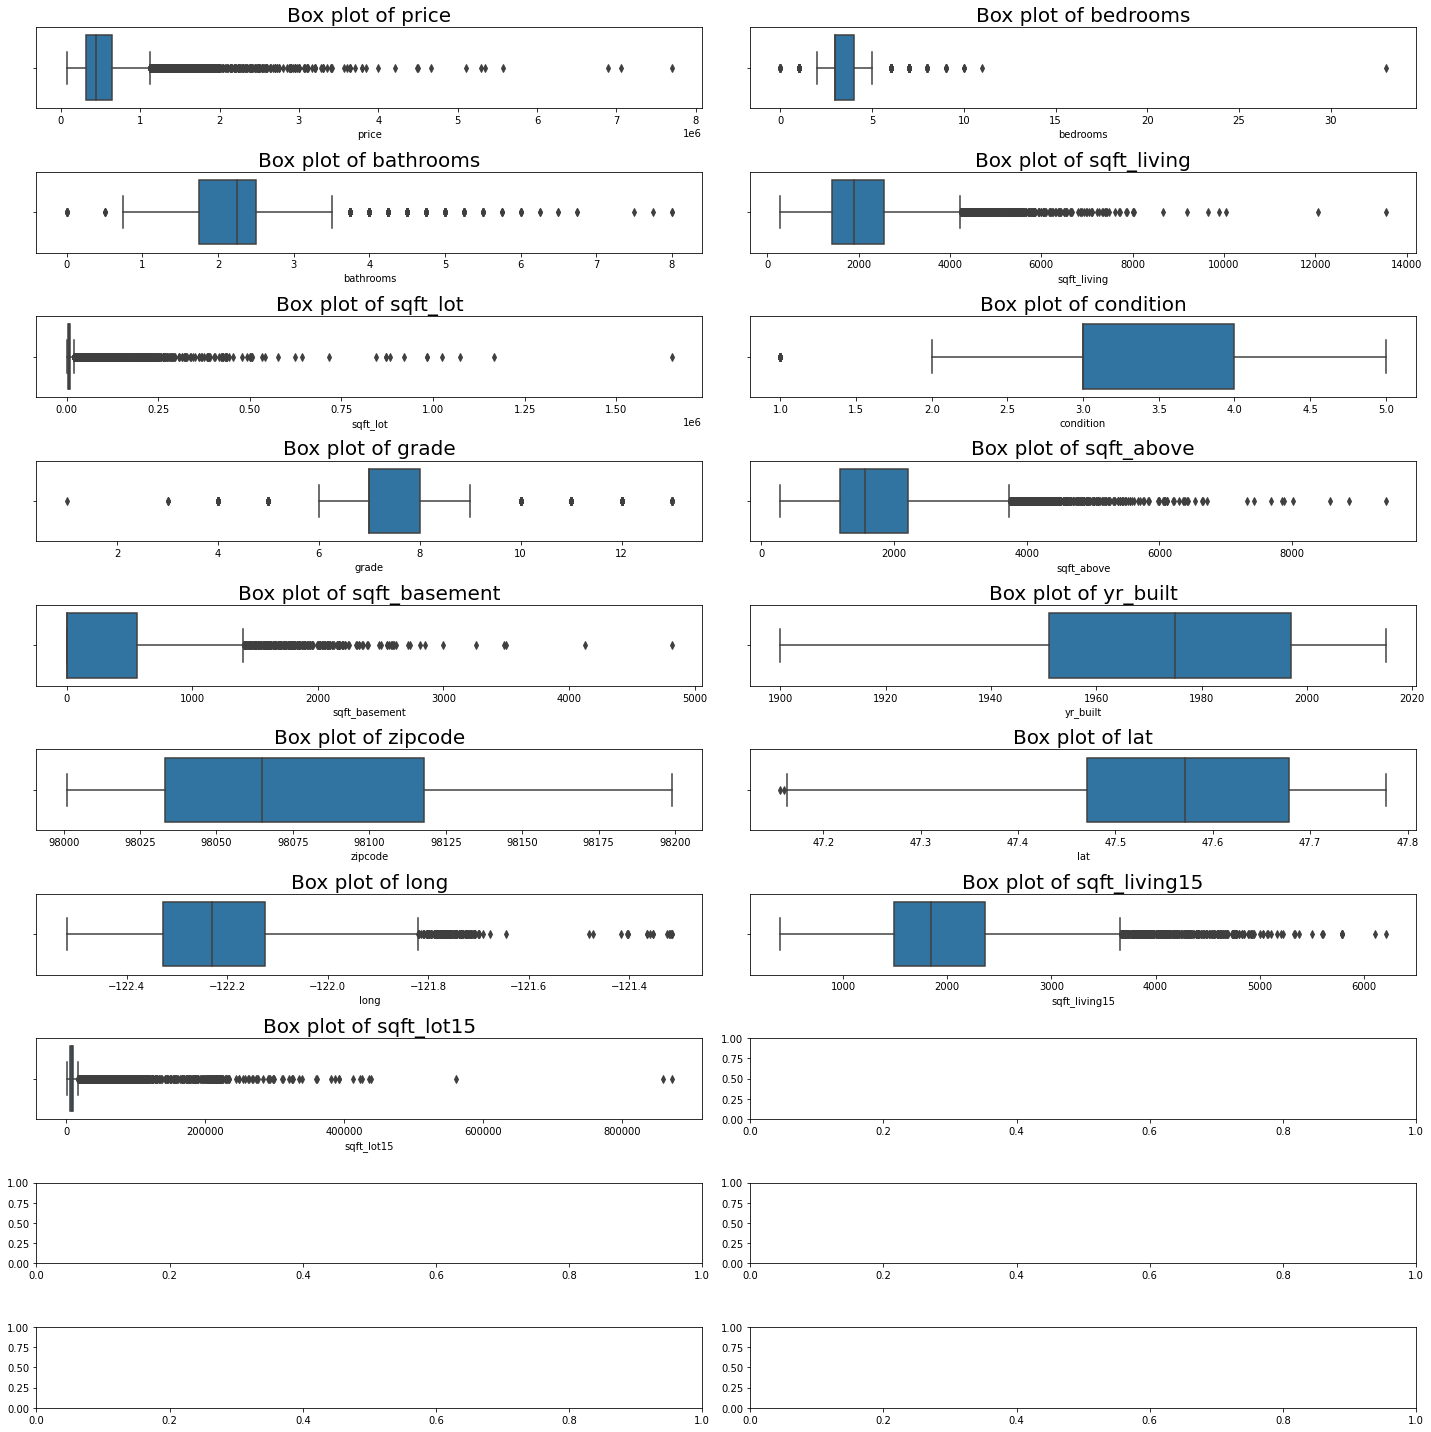

In [ ]:
#drop the columns with 90% and above of outliers
df_house2=df_house.drop(['id','view','waterfront','floors','yr_renovated'],axis=1)
names = list(df_house2.columns)

fig, axes = plt.subplots(10,2, figsize=(20,20))  

y = 0
for name in names:
  i, j = divmod(y, 2)
  sns.boxplot(x=df_house2[name], ax=axes[i, j])
  axes[i, j].set_title(f'Box plot of {name}', fontsize=20)
  y+=1

plt.tight_layout()
plt.show()


### Univariate analysis

In [ ]:
df_house2['price'].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


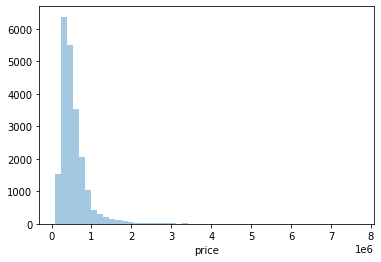

In [ ]:
#histogram
sns.distplot(df_house2['price'], bins=50, kde=False);


>> Given from the histogram: The price of the houses has appreciable positive skewness, deviates from the normal distribution and shows peakedness. Let's take a look at the skewness and kurtosis in numbers:

In [ ]:
print("Skewness: %f" % df_house['price'].skew())
print("Kurtosis: %f" % df_house['price'].kurt())

Skewness: 4.021716
Kurtosis: 34.522444


>> This is quite significant. At the data standardisation section, we will fix this.

### Bivariate Analysis

>> Before we proceed with our Linear Regression implementation, we need to check whether the values are correlated, meaning the variables that we consider to be independent have an influence over the dependent variable.

For this we can use the Pearson coefficient to measure the correlation between any 2 variables. The Pearson coefficient is a value between [-1, 1] which indicates the strength and the direction of the correlation between 2 variables.

The closer the Pearson coefficient is to the margins of the interval (-1 or 1), the stronger the correlation is.
A value closer to 0 indicates a lower correlation.
A negative value indicates a negative correlation between the independent and the dependent variables. An increase in the independent variable will cause a decrease in the dependent variable.
A positive value indicates a positive correlation between the independent and the dependent variable. An increase in the independent variable will cause the dependent variable to also increase.
We can use pandas to display the correlations between each and every variable.

In [ ]:
# Correlations
correlations = df_house2.corr(method='pearson')
(correlations)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248




1.   the variable with highest corelation is 'sqft_living'-assume is the square foot living room
2.   the 'grade' and 'sqft_above'and 'sqft_living15' closely follow this are the main variables that affect the price of houses
3. things like 'zipcode'completely has no effect on the house price followed by 'longitude' and 'condition'which is surprising(very lowly correlated)



>> We can also use seaborn to display a heatmap of our correlations.

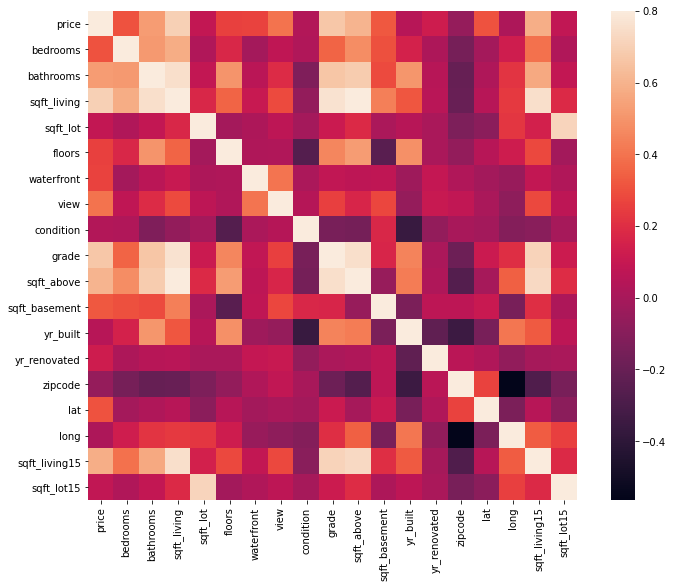

In [ ]:
corrmat = df_house2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

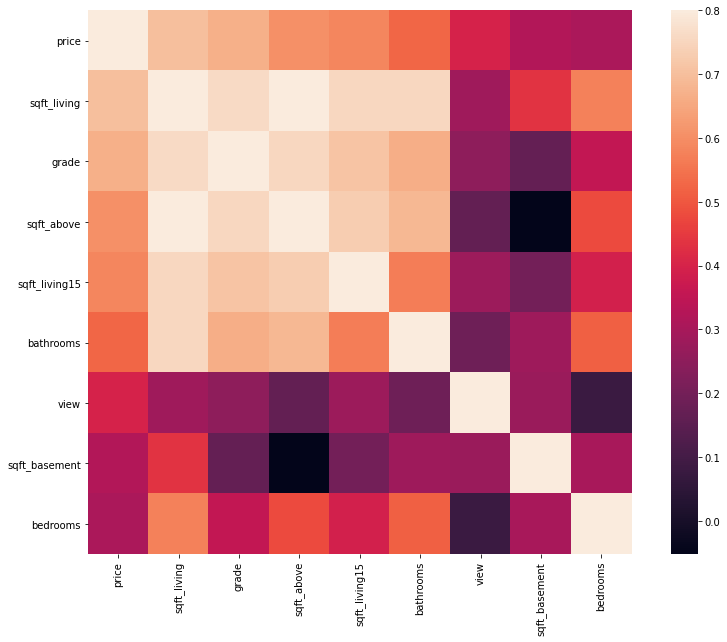

In [ ]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_house[cols].corr(), vmax=.8, square=True);

>> So we can draw the conclusion that the independent variables and the dependent variable are certainly correlated (some more, some less). But still, here we can start the Linear Regression implementation. With the depemdent variable being 'HOUSE PRICE'.We can check the importance (correlation value of each variable as listed below).

In [ ]:
df_house2.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
zipcode         -0.053168
Name: price, dtype: float64

### Multivariate Analysis

>> we will use linear Discriminant analysis.This analysis will help us in quantile regression also


In [ ]:
# we will use variables that are only highly positively correlated with the depedent variable price
#we also drop our target variable 'price'
high_corr= df_house2.drop(columns = ['price','lat','sqft_lot','sqft_lot15','yr_built','condition','long','zipcode'])
high_corr.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15'],
      dtype='object')

In [ ]:
price2=df_house2['price']
price2

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda2= lda.fit(high_corr, price2)
lda_high = lda2.transform(high_corr)

# Display the coeficients of the reduction process
lda2.coef_
real_df= pd.DataFrame(index=high_corr.columns.values, data=lda2.coef_[0].T)
real_df.sort_values(0, ascending=False)
#sqft_above and sqft_living are the main independent variables we will use as predictor variables

,0
sqft_above,0.003095
sqft_living,0.002749
sqft_living15,0.001502
sqft_basement,-0.000951
bathrooms,-1.897929
bedrooms,-3.120561
grade,-8.711541


#### Multi-collinearity

>> If the dataset has large no. of features, then it is possible that few of the features may be highly correlated. This is called as multi-collinearity.
Presence of multi-collinearity in data can destabilize the MLR model.
Due to presence of multi-collinearity, it is possible that statistically significant feature may be labelled as statistically insignificant.
Variance Inflation Factor (VIF):
It measures the magnitude of multi-collinearity. For example, to find multi-collinearity between two features X1 and X2, we build regression model between them as X1=α0+α1X2 and let R² be the R-square value for regression model.
Then variance inflation factor is given by VIF = 1/(1-R²). sqrt(VIF) of a feature is value that indicates by how much larger the standard error is increased, in presence of multicollinearity. If VIF=1 for all features, then features are not correlated. If VIF>4(threshold, some suggest 10), then we need to check the impact of multi-collinearity.lets check for multicolinearity:-

In [ ]:
# Detecting and Checking for multicollinearity for the independent variables only that are highly positively correlated
#we then drop our target variable 'price'
multi_co= df_house2.drop(columns = ['price','lat','sqft_lot','sqft_lot15','yr_built','condition','long','zipcode'])
#we then look for their correlation matrix
correlations = multi_co.corr()
correlations

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement,sqft_living15
bedrooms,1.000000,0.515884,0.576671,0.356967,0.477600,0.303093,0.391638
bathrooms,0.515884,1.000000,0.754665,0.664983,0.685342,0.283770,0.568634
sqft_living,0.576671,0.754665,1.000000,0.762704,0.876597,0.435043,0.756420
grade,0.356967,0.664983,0.762704,1.000000,0.755923,0.168392,0.713202
sqft_above,0.477600,0.685342,0.876597,0.755923,1.000000,-0.051943,0.731870
sqft_basement,0.303093,0.283770,0.435043,0.168392,-0.051943,1.000000,0.200355
sqft_living15,0.391638,0.568634,0.756420,0.713202,0.731870,0.200355,1.000000


In [ ]:
# we then compute the Variance Inflation Factor(VIF), BY FINDING the inverse correlation(above)

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement,sqft_living15
bedrooms,1.595715,-0.380173,-2.866298e-01,0.369324,-5.733270e-01,-3.519093e-01,0.033412
bathrooms,-0.380173,2.538715,-3.805839e+00,-0.659156,2.190354e+00,1.234902e+00,0.202502
sqft_living,-0.285135,-3.804398,-3.378158e+13,-0.228729,3.045838e+13,1.627855e+13,-1.130414
grade,0.369324,-0.659156,-2.333559e-01,3.031975,-1.236991e+00,-2.374732e-01,-0.803261
sqft_above,-0.573452,2.190774,3.045838e+13,-1.240633,-2.746209e+13,-1.467718e+13,-0.518092
sqft_basement,-0.350396,1.234113,1.627855e+13,-0.239449,-1.467718e+13,-7.844249e+12,-0.004367
sqft_living15,0.033412,0.202502,-1.131126e+00,-0.803261,-5.174506e-01,-4.023685e-03,2.679772


>>> multi-collinearity doesnt exist between our most important variables since none is VIF<4 FOR ALL WITH none =1....sooo there is no multicollinearity

### Multiple LineaR Regression

>>In this project we are going to use Python and Scikit-Learn to implement a Multiple Regression model that will try to predict house prices based on a few characteristics of those houses and historical data.(depending on our dataset)


We need to install a few dependencies before we can continue.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

>> Having loaded the dataset into a dataframe already, we can go on and  get a few interesting statistics about it.

In [ ]:
# Statistics
print(high_corr.describe())
print(price2.describe())

           bedrooms     bathrooms  ...  sqft_basement  sqft_living15
count  21613.000000  21613.000000  ...   21613.000000   21613.000000
mean       3.370842      2.114757  ...     291.509045    1986.552492
std        0.930062      0.770163  ...     442.575043     685.391304
min        0.000000      0.000000  ...       0.000000     399.000000
25%        3.000000      1.750000  ...       0.000000    1490.000000
50%        3.000000      2.250000  ...       0.000000    1840.000000
75%        4.000000      2.500000  ...     560.000000    2360.000000
max       33.000000      8.000000  ...    4820.000000    6210.000000

[8 rows x 7 columns]
count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


>> Before we proceed with our Linear Regression implementation, we need to check whether the independent variables are correlated, meaning the variables that we consider to be independent have an influence over the dependent variable.

In [ ]:
#We will first split our dataset into X and Y, meaning our independent and dependent variables.
# Split features and target
x = high_corr.values
y = price2.values


>> Now we want to perform a train-test dataset split. This means we are going to randomly select a portion of our dataset for the model training, while keeping a separate subset for model testing and evaluation. This ensures that the model is not biased and helps us obtain a better evaluation.

For this dataset we are going to use 70% of the dataset for the training set, while the remaining 30% goes to the test set.

In [ ]:
# Train-test split validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 8)
(6484, 8)
(15129,)
(6484,)


>> then we perform the linear regression

In [ ]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

>> now our model contains our estimates for our equation parameters. We can now use these estimates to obtain our house price estimations.

In [ ]:
# Test the model
y_pred = model.predict(x_test)

In [ ]:
#Train the model
pred_train= model.predict(x_train)

Text(0, 0.5, 'predicted Price')

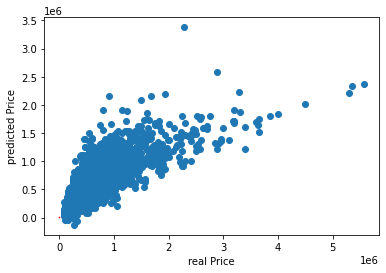

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([10,25],[10,25], 'r')
plt.xlabel('real Price')
plt.ylabel('predicted Price')

>> We can lookminto our model evaluation..Model Evaluation is an integral part of the model development process. It helps to find the best model that represents our dataset and how well the chosen model will work in the future. To avoid overfitting or underfitting, both methods use a test set (not seen by the model) to evaluate model performance.In our case we will use the RMSE 

In [ ]:
# Print RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, pred_train)))

248167.89332944457
233614.63084584594


In [ ]:
#print R2 SCORE
print(r2_score(y_test,y_pred))
print(r2_score(y_train,pred_train))

0.5739472771470129
0.5827934508623416


>> The above output shows that the RMSE, one of the two evaluation metrics, is 248167 thousand for test data and 233614 thousand for train data. On the other hand, R-squared value is 58 percent for train data and 57 percent for test data, which is a fairlY BAD performance.

>> How do we interpret this value? It means that for every real median house price in our dataset, our model will be wrong, on average, with about kes2481679. This is such a big error, judging by the big size of our dataset.

>> This means that if tomorrow we register new values for the characteristics followed in the dataset, we can feed them through our model and get an estimation for the median house price in the Hass consult company. But we have to be aware that the estimated price will be, on average, kes2481679/2336146 higher with test  and lower than the actual value. The error might be larger, smaller, but on average it's kes2481679.

In [ ]:
accuracy = model.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 57%'

In [ ]:
accuracy = model.score(x_train, y_train)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 58%'

>>* very poor accuracy we try other models.As discussed above, linear regression works by selecting coefficients for each independent variable that minimizes a loss function.
>>* However,our coefficients are too large, which has led to the model over-fitting for both the training and testing dataset. Such a models wont generalize well on the unseen data.
>>* To overcome this shortcoming, we do regularization which penalizes large coefficients.We will use coefficients we had gotten in multivariate analysis,where we had already done reduction .

### Ridge Regression

>>* Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

* Loss function = OLS + alpha * summation (squared coefficient values)

>>* In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

>>* In scikit-learn, a ridge regression model is constructed by using the Ridge class. The first line of code below instantiates the Ridge Regression model with an alpha value of 0.01.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)
pred_test_rr= rr.predict(x_test)


In [ ]:
#rmse for train dataset
print(np.sqrt(mean_squared_error(y_train,pred_train)))
print(r2_score(y_train, pred_train))
#rmse for test dataset
print(np.sqrt(mean_squared_error(y_test,y_pred))) 
print(r2_score(y_test, y_pred))

233614.63084584594
0.5827934508623416
248167.89332944457
0.5739472771470129


In [ ]:
coef_rr = {}
for coef, feat in zip(model.coef_,df_house2.columns):
    coef_rr[feat] = coef
coef_rr

{'bathrooms': -761460931508149.9,
 'bedrooms': -19388.73256809615,
 'condition': 761460931508337.8,
 'grade': 761460931508383.4,
 'price': -31955.533829995362,
 'sqft_above': -1.9592096437872897,
 'sqft_living': 87327.59038259755,
 'sqft_lot': 95983.58717168975}

>>The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 233614 thousand and 58.2 percent, respectively. For the test data, the result for these metrics is 248167 thousand and 57 percent, respectively.

### Lasso Regression

>>* Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

* Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

>>* In the above loss function, alpha is the penalty parameter we need to select. Using an l1 norm constraint forces some weight values to zero to allow other coefficients to take non-zero values.
>>* In scikit-learn, a lasso regression model is constructed by using the Lasso class. The first line of code below instantiates the Lasso Regression model with an alpha value of 0.01

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
pred_test_lasso= model_lasso.predict(x_test)

In [ ]:
#the train dataset
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))
#the test dataset
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

233613.38673757314
0.5827978944944487
248172.16494205696
0.5739326100776919


>>* The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 233613 thousand and 58.2 percent, respectively.

>>* The results for these metrics on the test data is 248172 thousand and 57 percent, respectively. **Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero.As shown below**

In [ ]:
# Importing library for visualization
import matplotlib.pyplot as plt
coefsLasso = [] 
# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = model_lasso(alpha=alphasLasso[i])
    lasso.fit(x_train, y_train)
    coefsLasso.append(lasso.coef_)
# Building Lasso coefficient plots
plt.figure(figsize = (16,7))
plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


TypeError: ignored

### ElasticNet Regression

>>* ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In scikit-learn, an ElasticNet regression model is constructed by using the ElasticNet class. The first line of code below instantiates the ElasticNet Regression with an alpha value of 0.01.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

In [ ]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred_train_enet= model_enet.predict(x_train)
pred_test_enet= model_enet.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411837526439287.5, tolerance: 197906100835.7553
  positive)


In [ ]:
#train dataset
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

#test dataset
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

233615.2513632802
0.5827912345261447
248195.67632760853
0.5738518765337456


>>* The above output shows that the RMSE and R-squared value for the ElasticNet Regression model on the training data is 233615 thousand and 58 percent, respectively. The results for these metrics on the test data is 248195 thousand and 57 percent, respectively.

### Conclusion

>>* The performance of the models is summarized below:

1. Linear Regression Model: Test set RMSE of 248195.7 thousand and R-square of 58.27 percent.

2. Ridge Regression Model: Test set RMSE of 248195.7thousand and R-square of 58.27 percent.

3. Lasso Regression Model: Test set RMSE of 248195.7 thousand and R-square of 58.27 percent.

4. ElasticNet Regression Model: Test set RMSE of 248195.7thousand and R-square of 58.27 percent.

All Regression modelS ARE performing the SAME. They are performing fairly bad with a decent R-squared and stable RMSE values. The most ideal result would be an RMSE value of zero and R-squared value of 1, but that's almost impossible in real economic datasets.

>>* There are other iterations that can be done to improve model performance. We have assigned the value of alpha to be 0.01, but this can be altered by hyper parameter tuning to arrive at the optimal alpha value.
>>* Cross-validation can also be tried along with feature selection techniques. However, that is not covered in this guide which was aimed at enabling individuals to understand and implement the various Linear Regression models using the scikit-learn library.